# <center> Analysis of Stray Kids' Discography in Spotify
__<center>A Data Programming Project__
<center>By: Stephanie Yolanda

## Introduction to the research space
### Aims and objectives
As a huge fan of music, I am extremely interested in the technicalities of music and understanding what makes a song enjoyable and popular. That is why I aim to analyze how the features of songs impact the popularity of the songs themselves and how it impacts the artists' growth over the years.

## Introduction to the research space
### Aims and objectives
As a huge fan of music, I am extremely interested in the technicalities of music and understanding what makes a song enjoyable and popular. That is why I aim to analyze how the features of songs impact the popularity of the songs themselves and how it impacts the artists' growth over the years.

### Acquire a dataset
The dataset needed for this project will be acquired using the Spotify API and the requests module in Python.

### Utlising the dataset
Using Jupyter Notebook, I will be analysing the correlation between the features and information of songs that Stray Kids officially released or participated in. To do so, I will use data visualisations and draw appropriate conclusions of the dataset.

### Writing style to communicate ideas and concepts
This project will be delivered in short sections and explained with as little technical terminologies as possible for the ease of understanding. By doing so, people with all kinds of skill levels would be able to understand my process of thoughts while doing this project.

### Summary of the area of research
This project researches and analyzes about how features of Stray Kids' songs correlate to each other, and understand what kind of songs Stray Kids' listeners and fans prefer. This project will also help understand Stray Kids' own color and style of music.

## Import requirements

In [1]:
# Import required modules and libraries
import requests
import base64
import datetime
from urllib.parse import urlencode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

## Relevancy of data and justified use of data source
### Origin of data
The source of the data acquired for this project is as stated before, the official Spotify API and scraped by utilising the requests module in Python. The process of acquiring the data is done accordingly to the documentation of the Spotify API. 

Since requests to the API require authentication, I decided to go for the Client Credentials flow. As stated in the documentation, the Client Credentials flow is good for backend applications that do not need user authorization, which is perfect for this project as it does not need to access any personal user information.

### Authentication for requests to the the API

In [2]:
client_id = 'f092544163b441cd87cd568a605e70fd'
client_secret = 'b89feafc853847dcb46bcbdd96039ad3'
client_credentials = f'{client_id}:{client_secret}'
client_creds_base64 = base64.b64encode(client_credentials.encode())

token_url = 'https://accounts.spotify.com/api/token'
token_data = {'grant_type' : 'client_credentials'}
# Authorization: Basic <base64 encoded client_id:client_secret>
token_header = {'Authorization': f'Basic {client_creds_base64.decode()}',
                'Content-Type' : 'application/x-www-form-urlencoded'}

In [3]:
# Exception handling for the request to the Spotify API
try:
    # Get the response from the request
    response = requests.post(token_url, headers=token_header, data=token_data)
    print('Status code:', response.status_code)
    response.raise_for_status()
except requests.exceptions.HTTPError as err:
    print(err)
except requests.exceptions.Timeout as err:
    print(err)
except requests.exceptions.RequestException as err:
    print(err)

Status code: 200


In [4]:
client_credentials = f'{client_id}:{client_secret}'
client_creds_base64 = base64.b64encode(client_credentials.encode())
client_creds_base64

b'ZjA5MjU0NDE2M2I0NDFjZDg3Y2Q1NjhhNjA1ZTcwZmQ6Yjg5ZmVhZmM4NTM4NDdkY2I0NmJjYmRkOTYwMzlhZDM='

In [5]:
token_url = 'https://accounts.spotify.com/api/token'
token_data = {'grant_type' : 'client_credentials'}
# Authorization: Basic <base64 encoded client_id:client_secret>
token_header = {'Authorization': f'Basic {client_creds_base64.decode()}',
                'Content-Type' : 'application/x-www-form-urlencoded'}

In [6]:
# Get the access token needed for extracting data
print(response.json())
access_token = response.json()['access_token']

{'access_token': 'BQBII_-uO9uM-DaGjcxJG6I3Xi9jWFGVd8JzQIjdgY-x662wKyot1s2cPnP5a9FiH6D2yQTh2bmLigkRidC5RUSXxmttqtjkKs2KbezbFdp-MNHfhLM', 'token_type': 'Bearer', 'expires_in': 3600}


### Retrieve data in JSON format

In [7]:
# Function to retrieve data depending on parameters in JSON format

def getJSON(url, query):
    # Authorization : Bearer <Access Token>
    headers = {'Authorization' : f'Bearer {access_token}'}
    endpoint = url
    responses = requests.get(endpoint, headers=headers, params=query)
    return responses.json()

In [8]:
# Get the information of all albums

def getAlbums(_id, albums_list):
    url = f'https://api.spotify.com/v1/artists/{_id}/albums'
    query = {'include_groups' : 'album,single,compilation',
             'market' : 'US'}
    data = getJSON(url, query)
    albums = data['items']
    
    # Go through all JSON pages
    while (data['next']):
        data = getJSON(data['next'], None)
        albums.extend(data['items'])
        
    for album in albums:
        albums_list.append({'id' : album['id'],
                            'name' : album['name'],
                            'release_date' : album['release_date'],
                            'total_tracks' : album['total_tracks'],
                            'type' : album['type']})

albums = []
getAlbums('2dIgFjalVxs4ThymZ67YCE', albums)

# Display JSON data utilising the json module
print(json.dumps(albums, indent=3))

[
   {
      "id": "0Gmf4pfe0POEQq2FgGAj2q",
      "name": "ODDINARY",
      "release_date": "2022-03-18",
      "total_tracks": 7,
      "type": "album"
   },
   {
      "id": "3sMj0uu8dKNRnyqQozC1Xv",
      "name": "SKZ2021",
      "release_date": "2021-12-23",
      "total_tracks": 14,
      "type": "album"
   },
   {
      "id": "558tpdCejjVQNFAumRAeQj",
      "name": "NOEASY",
      "release_date": "2021-08-23",
      "total_tracks": 14,
      "type": "album"
   },
   {
      "id": "06EHg8PHtDhbZMpE0jmhEn",
      "name": "ALL IN",
      "release_date": "2020-10-27",
      "total_tracks": 7,
      "type": "album"
   },
   {
      "id": "0aERWcI2KYSCM4biUihB9X",
      "name": "IN LIFE",
      "release_date": "2020-09-14",
      "total_tracks": 17,
      "type": "album"
   },
   {
      "id": "6DWLIzvmiLPAuDWYZqrLQo",
      "name": "GO LIVE",
      "release_date": "2020-06-17",
      "total_tracks": 14,
      "type": "album"
   },
   {
      "id": "0st9OqpsKmmtwUz6cS14Fj",
      "nam

In [9]:
# Get the IDs of all tracks

def getAlbumTrackIDs(_id, ids_list):
    url = f'https://api.spotify.com/v1/albums/{_id}/tracks'
    query = {'market' : 'US'}
    data = getJSON(url, query)
    tracks = data['items']
    
    # Go through all JSON pages
    while (data['next']):
        data = getJSON(data['next'], None)
        tracks.extend(data['items'])
        
    for track in tracks:
        ids_list.append(track['id'])

# Store the returned IDs
track_ids = []
for index in range(len(albums)):
    getAlbumTrackIDs(albums[index]['id'], track_ids)
track_ids

['4b3rGL8LDSkbARUUA20136',
 '63irPUP3xB74fHdw1Aw9zR',
 '4QDpsNBlllaLGj8zbF2EE0',
 '2L7hSYdvF0CtaM6JisfKEG',
 '2xo84jGkxFPrZmmBtS3Pkd',
 '2LzRBroL4J9pXLf1Nsen4s',
 '0oHn3CGVerdfLqIrN6CT42',
 '0bqTleRlZBXtueX1fyVlcc',
 '3vaCSLh9vDnG75rIbD2l3f',
 '6p4pfgTkaktK4sp3ZP7NzA',
 '26TIfStHIKPlgzr4PkTB0i',
 '62x6J6Mfom0h7J509dvusH',
 '27ONBeTAyqpBJG2Nv01qdf',
 '4PpMKj0qmas8OncPsDH7F1',
 '2yTpNVq1gSpfaW9TNNtqeM',
 '4awANMW1SGfKtN5283lWjN',
 '0V1nMNKvNsPfq3KAQ3wDp6',
 '3kSuhOJll1HiI05IFJ72SR',
 '4ppuLW4bGqMhRK90XMEzcb',
 '5IqYohaBtPHl30pE07RGqO',
 '1QpB7Lk986qwjOBiZbLSxP',
 '7qpSatdWQcRHA3hpedL2u4',
 '0nwTMzpatarzvLvtwwzdCt',
 '6Ib6RkvLBMD85bov85apSL',
 '238HdxvQkmYeSyo6qkPQoU',
 '5FM1V3qjHroqsXRBbL57rW',
 '5kkOHHTccylnkYxDRgDWMs',
 '5kBJH5gU89axZDauhfddpy',
 '1pLJ9T4v4p68otzCDonbc6',
 '1LSHzXAZXQH9R1zSEFF8Hz',
 '0LatE4S9UtCDwIdGQsFFKL',
 '1FdnsU6An1Ye3uBJe8j23c',
 '6l8YJbgWzvh05e3Bnfw9lw',
 '0aWEt5aMfU2zYxE1tg2efw',
 '2afx8zfrOsN3QVEWSx5IPp',
 '1COXMzXT4JxnQCePCeptPP',
 '6ilFCE6Ec0g4i6qbay0t6s',
 

In [10]:
# Get the metadata of a track

def getTrackMetadata(_id):
    url = f'https://api.spotify.com/v1/tracks/{_id}'
    query = {'market' : 'US'}
    data = getJSON(url, query)
    return data

In [11]:
# Get the audio features of a track

def getAudioFeatures(_id):
    url = f'https://api.spotify.com/v1/audio-features/{_id}'
    data = getJSON(url, None)
    return data

In [12]:
# Get the information of the tracks

def getTrackInfo(_id):
    metadata = getTrackMetadata(_id)
    name = metadata['name']
    artist = metadata['album']['artists'][0]['name']
    album = metadata['album']['name']
    release_date = metadata['album']['release_date']
    duration = metadata['duration_ms']
    popularity = metadata['popularity']
    
    features = getAudioFeatures(_id)
    danceability = features['danceability']
    energy = features['energy']
    key = features['key']
    loudness = features['loudness']
    mode = features['mode']
    speechiness = features['speechiness']
    acousticness = features['acousticness']
    instrumentalness = features['instrumentalness']
    liveness = features['liveness']
    valence = features['valence']
    tempo = features['tempo']
    time_signature = features['time_signature']
    
    # Store track information in a dictionary
    track = ({'id': _id, 
              'name': name, 
              'artist': artist,
              'album': album,
              'release_date': release_date, 
              'duration_ms': duration,
              'popularity': popularity,
              'danceability': danceability, 
              'energy': energy, 
              'key': key, 
              'loudness': loudness, 
              'mode': mode, 
              'speechiness': speechiness, 
              'acousticness': acousticness, 
              'instrumentalness': instrumentalness, 
              'liveness': liveness, 
              'valence': valence, 
              'tempo': tempo, 
              'time_signature': time_signature}) 
    return track

# Store the returned dictionaries
tracks = []
for _id in track_ids:
    tracks.append(getTrackInfo(_id))
    
# Display JSON data utilising the json module
print(json.dumps(tracks, indent=3))

[
   {
      "id": "4b3rGL8LDSkbARUUA20136",
      "name": "VENOM",
      "artist": "Stray Kids",
      "album": "ODDINARY",
      "release_date": "2022-03-18",
      "duration_ms": 194840,
      "popularity": 73,
      "danceability": 0.812,
      "energy": 0.807,
      "key": 9,
      "loudness": -3.354,
      "mode": 1,
      "speechiness": 0.339,
      "acousticness": 0.11,
      "instrumentalness": 0,
      "liveness": 0.211,
      "valence": 0.4,
      "tempo": 136.979,
      "time_signature": 4
   },
   {
      "id": "63irPUP3xB74fHdw1Aw9zR",
      "name": "MANIAC",
      "artist": "Stray Kids",
      "album": "ODDINARY",
      "release_date": "2022-03-18",
      "duration_ms": 182757,
      "popularity": 82,
      "danceability": 0.581,
      "energy": 0.8,
      "key": 1,
      "loudness": -2.613,
      "mode": 1,
      "speechiness": 0.411,
      "acousticness": 0.154,
      "instrumentalness": 0,
      "liveness": 0.0697,
      "valence": 0.709,
      "tempo": 119.872,
     

The table below gives a better understanding of what each audio feature represent.

<table >
    <tr>
        <th>Audio Feature</th>
        <th>Explanation</th>
        <th>Value Bounds</th>
    </tr>
    <tr>
        <td>Danceability</td>
        <td>How suitable the track is for dancing</td>
        <td>0.0 to 1.0</td>
    <tr>
    <tr>
        <td>Energy</td>
        <td>How intense and active the track is</td>
        <td>0.0 to 1.0</td>
    <tr>
    <tr>
        <td>Key</td>
        <td>The key of the track</td>
        <td>0=C, 1=C#, 2=D, ...</td>
    <tr>
    <tr>
        <td>Loudness</td>
        <td>Loudness of the track (decibels)</td>
        <td>-</td>
    <tr>
    <tr>
        <td>Mode</td>
        <td>The modality (major or minor) of the track</td>
        <td>0 (Minor) or 1 (Major)</td>
    <tr>
    <tr>
        <td>Speechiness</td>
        <td>How present spoken words are in the track</td>
        <td>0.0 to 1.0</td>
    <tr>
    <tr>
        <td>Acousticness</td>
        <td>How acoustic is the track</td>
        <td>0.0 to 1.0</td>
    <tr>
    <tr>
        <td>Instrumentalness</td>
        <td>Loudness</td>
        <td>0.0 to 1.0</td>
    <tr>
    <tr>
        <td>Liveness</td>
        <td>The possibility of an audience present in the track recording</td>
        <td>0.0 to 1.0</td>
    <tr>
    <tr>
        <td>Valence</td>
        <td>How positive is the track</td>
        <td>0.0 to 1.0</td>
    <tr>
    <tr>
        <td>Tempo</td>
        <td>The number of beats per minute in a track</td>
        <td>-</td>
    <tr>
    <tr>
        <td>Time signature</td>
        <td>The number of beats in each bar</td>
        <td>3 (indicating 3/4) to 7 (indicating 7/4)</td>
    <tr>
</table>


### Why the data source is appropriate
Since this project aims to analyse the features of the song, the data set needs contains a lot of descriptive information about each song or track. The Spotify API provides a lot of parameters and information about each song, and therefore it is very much suitable for this project.

### The identifiable case for working with this data
This specific type of data is able to describe the features of the songs and able to give an idea of what each song's characteristics are, and also the artist's growth and progress in their releases as a whole.

### How the format of data is suitable for analysis
As stated before, the Spotify API requests output data in the JSON format. When all the required data is scraped from the API, the data is compiled and exported into a CSV file to store the scraped data at time of analysis. The CSV file is then read and stored as a data frame using the pandas library, an open source tool for data analyis and manipulation which is very much suitable for this project's type of analysis.

### Consideration of two other datasets
When starting this project, Apple Music and Last.fm were two of the top APIs that I considered utilising. Something I liked about the Apple Music API was that it provides data of the songs' genre, which Spotify did not have. However, after reading up more on both APIs' documentations, I realized that unlike Spotify, the data acquired from those APIs were not descriptive enough for what I plan to do as there is not much information about the songs' features.

## Ethics of use of data
### Where the data comes from
The data in this project is retrieved from the official Spotify API, and the spotify developer terms of the API is stated in the website below.
> https://developer.spotify.com/terms/

Spotify itself is not open-source and does not allow the modification, reverse-engineering, or extraction of the source code from the Spotify Platform, Spotify Service, or Spotify Content.

Data is retrieved by following the instructions stated in the Spotify API website with the obtained personalised client id and client secret.

### Considerations about usage/reusage of data
As mentioned in the terms, the Spotify Platform, Spotify Service, Spotify Content and any Spotify Marks are owned by Spotify and are under the intellectual property protection. This project complies with the developer terms and does not claim any ownership over the intellectual property owned by Spotify. As this project only serves as an analysis of the data retrieved from the Spotify API, there will be no manipulation of data in the Spotify source code and/or database. Data retrieved is also not to be stored as another compilation of Spotify's database, and only data needed to execute this project is extracted.

### Considerations around implications of utilising data for purpose
This project analyses data of the artist 'Stray Kids' and will only draw conclusions from the data that does not put the artist or any other parties in a bad light. There will be no personal judgements of the artist based on my own personal feelings that would impact any parties negatively.

### Considerations of the data processing pipeline
All processes of use of the data obtained from the Spotify API is stated clearly in this project and is transparent complying to the terms.

### Potential biases of the dataset
Spotify is available almost all around the world and has a huge market. There should be no biases in the dataset retrieved from the Spotify API.

## Project background
### Why the field is of interest
For this project, I decided to choose Stray Kids as the subject of analysis as I am an avid listener of the group and have a good understanding of their discography over the years. As a background, Stray Kids is an 8 member group formed by JYP Entertainment. They were first introduced on the second half of 2017, in a survival show by JYP Entertainment and Mnet that aimed to debut a group. After the survival show ended, they debuted on March 25, 2018 as a 9 member group, until a member left the group on October 28, 2019.

### Previous exploration of topic
Existing analysis utilising the Spotify API has generally been about the top songs charting in the application. However, as far as I have looked there has not been any that focuses on a particular artist's discography.

### Scope of work
I will only analyse the correlation between the audio features of Stray Kids' releases, and the songs' popularity amongst their listeners in the US Market. Due to time constraints, I will not be analysing Stray Kids' historical statistics such as their number of streams, album sales, concert sales, etc. as they require data not acquirable through the Spotify API.

### Steps in analytical data processing pipeline
1. Retrieve client credentials from the 'Spotify for Developers' dashboard page.
2. Retrieve access token through authentication to the Spotify API.
3. Retrieve the data needed (albums, tracks, metadata, audio features) through requests to the Spotify API.
4. Compile the data into a data frame.
5. Clean the data.
6. Visualise the data for analysis.
7. Draw conclusions from analysis.

### Evaluation of aims and objectives
By the end of the project, the data must be be visualised in a clear way that makes sense to the conclusion drawn, and also be able to answer the research questions of this project.

## Technical exploration of dataset

### Export data to a CSV file
The previously extracted data is exported as a CSV file to prevent too much time spent on loading the extraction of data, and also prevent data changes that might affect the analysis later in this project.

This part utilises the pandas library that allows the creation of a dataframe which will be helpful for managing data and manipulating it.

In [13]:
# Export the compiled tracks into a csv file
# df = pd.DataFrame.from_dict(tracks)
# df.to_csv('tracks.csv', sep=',', index=False)

### Store retrieved data as a pandas data frame

In [14]:
# Read previously exported csv file of tracks data
df = pd.read_csv('tracks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                197 non-null    object 
 1   name              197 non-null    object 
 2   artist            197 non-null    object 
 3   album             197 non-null    object 
 4   release_date      197 non-null    object 
 5   duration_ms       197 non-null    int64  
 6   popularity        197 non-null    int64  
 7   danceability      197 non-null    float64
 8   energy            197 non-null    float64
 9   key               197 non-null    int64  
 10  loudness          197 non-null    float64
 11  mode              197 non-null    int64  
 12  speechiness       197 non-null    float64
 13  acousticness      197 non-null    float64
 14  instrumentalness  197 non-null    float64
 15  liveness          197 non-null    float64
 16  valence           197 non-null    float64
 1

In [15]:
df.describe().round(2)

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00
mean,197129.78,53.22,0.67,0.80,5.47,-4.12,0.59,0.14,0.10,0.02,0.21,0.53,128.59,3.98
std,30724.88,9.54,0.11,0.12,3.38,1.63,0.49,0.09,0.11,0.12,0.15,0.18,30.63,0.17
min,78834.00,28.00,0.34,0.32,0.00,-10.28,0.00,0.03,0.00,0.00,0.04,0.04,73.97,3.00
25%,187186.00,46.00,0.60,0.74,2.00,-4.86,0.00,0.06,0.02,0.00,0.10,0.39,99.99,4.00
50%,196839.00,54.00,0.68,0.82,5.00,-3.84,1.00,0.10,0.05,0.00,0.15,0.54,129.97,4.00
75%,212480.00,59.00,0.76,0.87,8.00,-3.12,1.00,0.22,0.15,0.00,0.29,0.66,153.97,4.00
max,291844.00,82.00,0.90,0.98,11.00,-1.46,1.00,0.41,0.53,0.94,0.63,0.96,200.11,5.00


### Dataset processed to remove illegal values
The dataset in this project do not have illegal values, though it does contained duplicates in which are removed accordingly. However, I did do some checks for null values in the dataset and whether the IDs in the data frame contain illegal values just to confirm.

In [16]:
# Check if the total number of tracks changed

if len(df) == len(tracks):
    print("All tracks have successfully been scraped into dataframe")
else:
    print("Number of tracks scraped has changed")

All tracks have successfully been scraped into dataframe


In [17]:
# Check for any missing values in the dataframe

if df.isna().any().sum() == 0:
    print("There are no missing values in the dataframe")
else:
    print("There are {} missing values in the dataframe".format(df.isna().any().sum()))

There are no missing values in the dataframe


In [18]:
# Check if there are illegal values in the id
df['id'].groupby(df['id'].str.match('^[A-Za-z0-9]*$').astype(bool)).count()

id
True    197
Name: id, dtype: int64

### Data is in the correct format for analysis
Data in this project is ultimately stored as a pandas data frame, which in my opinion is very flexible in managing the data and acts as a strong base for data visualisation, making it very suitable for this project's analysis.

### Checks for out of bound values
The numerical data from certain columns of the data frame are checked for any out of bound values using conditional statements.

In [19]:
# Check if the values (audio features + popularity) in the dataframe are within the expected values

valid = 0

if (df['duration_ms'] >= 0).all():
    valid += 1
    
if (df['popularity'] >= 0).all() and (df['popularity'] <= 100).all():
    valid += 1
    
if (df['danceability'] >= 0).all() and (df['danceability'] <= 1).all():
    valid += 1
    
if (df['energy'] >= 0).all() and (df['energy'] <= 1).all():
    valid += 1
    
if (df['key'] >= 0).all() and (df['key'] <= 11).all():
    valid += 1
    
if (df['loudness'] >= -60).all() and (df['loudness'] <= 0).all():
    valid += 1
    
if (df['mode'].isin([0,1])).all():
    valid += 1
    
if (df['speechiness'] >= 0).all() and (df['speechiness'] <= 1).all():
    valid += 1
    
if (df['acousticness'] >= 0).all() and (df['acousticness'] <= 1).all():
    valid += 1
    
if (df['instrumentalness'] >= 0).all() and (df['instrumentalness'] <= 1).all():
    valid += 1
    
if (df['liveness'] >= 0).all() and (df['liveness'] <= 1).all():
    valid += 1
    
if (df['valence'] >= 0).all() and (df['valence'] <= 1).all():
    valid += 1
    
if (df['tempo'] >= 0).all():
    valid += 1
    
if valid == 13:
    print("The values in the dataframe is valid")
else:
    print("There are invalid values in the dataframe")

The values in the dataframe is valid


### Depth of exploration
When the dataset was first scraped from the Spotify API, I realised that the newest releases have a popularity value of 0. I was considering excluding the newest releases in the dataset, however a few days later, I saw that the popularity value have been updated, and so I decided to include them in the dataset.

Additionally, as a member left the group in late 2019, Stray Kids re-released their older songs as an 8 member group in 2020 and 2021. Due to those re-releases, it acts as duplicates in the dataset, though the values of the audio features are ever so slightly different do to them being re-recorded. Therefore, I created a new data frame that deleted those duplicates to solve this problem.

### Data is in an appropriate format
As stated before, storing the data in a pandas data frame format acts as a very strong base for data visualisations. The pandas data frame works extremely well with the data visualisation libraries used in this project, which are matplotlib and seaborn.

## Clear rhetoric for modications to data
### Time related data
Columns with values related to time are not set in the correct data type, therefore to make the dataset more appropriate and easier to handle, these data are modified.

This part utilises the datetime library to convert the data to a datetime format accordingly.

In [20]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], format = '%Y-%m-%d')

In [21]:
# Add a new column for year
df['year'] = df['release_date'].dt.year

In [22]:
# Add a formatted duration column
df['duration'] = pd.to_datetime(df['duration_ms'], unit='ms').dt.strftime('%M:%S:%f')

### Handle duplicates in dataset
Spotify has a widely known issue for having duplicates of albums and tracks, but this can be fixed by deleting the less popular duplicate track.

In [23]:
# Sort the values to cluster song duplicates together
df = df.sort_values(by=['album', 'name', 'popularity'])
df.head()

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
147,1bIbXKrXRxfNh1l9a9lN2Q,ALL IN,Stray Kids,ALL IN,2020-10-20,187186,59,0.740,0.834,0,...,1,0.293,0.0392,0.0,0.0568,0.775,139.961,4,2020,03:07:186000
35,1COXMzXT4JxnQCePCeptPP,ALL IN,Stray Kids,ALL IN,2020-10-27,187186,60,0.740,0.834,0,...,1,0.293,0.0392,0.0,0.0568,0.775,139.961,4,2020,03:07:186000
39,1lrgT4CLJNrZCNCF6Fwm0k,Back Door -Japanese ver.-,Stray Kids,ALL IN,2020-10-27,191360,43,0.826,0.832,7,...,0,0.295,0.1430,0.0,0.0741,0.664,107.984,4,2020,03:11:360000
36,6ilFCE6Ec0g4i6qbay0t6s,FAM,Stray Kids,ALL IN,2020-10-27,215066,56,0.885,0.788,7,...,1,0.081,0.0660,0.0,0.0688,0.335,105.030,4,2020,03:35:066000
37,4GyHQOpfrElhvKjIfXSEf3,One Day,Stray Kids,ALL IN,2020-10-27,193186,49,0.760,0.810,8,...,1,0.081,0.1460,0.0,0.0720,0.542,145.054,4,2020,03:13:186000


In [24]:
# Delete song duplicates with lower popularity
df = df.drop_duplicates(subset=['name', 'album'], keep='last')
df.head()

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
35,1COXMzXT4JxnQCePCeptPP,ALL IN,Stray Kids,ALL IN,2020-10-27,187186,60,0.740,0.834,0,...,1,0.293,0.0392,0.0,0.0568,0.775,139.961,4,2020,03:07:186000
39,1lrgT4CLJNrZCNCF6Fwm0k,Back Door -Japanese ver.-,Stray Kids,ALL IN,2020-10-27,191360,43,0.826,0.832,7,...,0,0.295,0.1430,0.0,0.0741,0.664,107.984,4,2020,03:11:360000
36,6ilFCE6Ec0g4i6qbay0t6s,FAM,Stray Kids,ALL IN,2020-10-27,215066,56,0.885,0.788,7,...,1,0.081,0.0660,0.0,0.0688,0.335,105.030,4,2020,03:35:066000
37,4GyHQOpfrElhvKjIfXSEf3,One Day,Stray Kids,ALL IN,2020-10-27,193186,49,0.760,0.810,8,...,1,0.081,0.1460,0.0,0.0720,0.542,145.054,4,2020,03:13:186000
41,5duEyPwRu0D5RVLkVORqLG,SLUMP -Japanese ver.-,Stray Kids,ALL IN,2020-10-27,136133,55,0.598,0.813,7,...,1,0.246,0.1580,0.0,0.1250,0.686,159.888,4,2020,02:16:133000


### Handle collaboration tracks
Over the past few years, Stray Kids has done collaboration songs with other artists. However, there is a possibility that the whole album or EP the collaboration track is in also gets included into the dataset. Due to that reason, songs that has nothing to do with Stray Kids have to be singled out and deleted.

In [25]:
# Show songs that are not by Stray Kids
df[~df['artist'].str.contains('Stray Kids')]

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
144,7arsXR8AtExnOFN3v3HiJI,Going Dumb,Alesso,Going Dumb,2021-03-19,168601,68,0.834,0.678,6,...,0,0.0515,0.0546,0.263000,0.103,0.551,121.995,4,2021,02:48:601000
145,3Ea1CNsTqBY4RtAESrBeNI,Going Dumb (with Stray Kids),Alesso,Going Dumb,2021-03-19,169506,63,0.834,0.651,6,...,0,0.0595,0.1530,0.000000,0.146,0.490,121.978,4,2021,02:49:506000
143,3csbMYO3DEWUpHemWaXlaH,Going Dumb (with Stray Kids) [Mike Williams Re...,Alesso,Going Dumb (with Stray Kids) [Mike Williams Re...,2021-05-28,166875,44,0.776,0.739,6,...,0,0.2330,0.0258,0.000013,0.114,0.634,128.058,4,2021,02:46:875000


In [26]:
# Show songs that are not by Stray Kids and do not have Stray Kids as a featuring artist
df[(~df['artist'].str.contains('Stray Kids')) & (~df['name'].str.contains('Stray Kids'))]

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
144,7arsXR8AtExnOFN3v3HiJI,Going Dumb,Alesso,Going Dumb,2021-03-19,168601,68,0.834,0.678,6,...,0,0.0515,0.0546,0.263,0.103,0.551,121.995,4,2021,02:48:601000


In [27]:
# Drop songs that are not by Stray Kids and do not have Stray Kids as a featuring artist
df = df[(df['artist'].str.contains('Stray Kids')) | (df['name'].str.contains('Stray Kids'))]

### Create a new data frame for unique tracks

Due to the re-releases Stray Kids did after a member left, there are duplicates in the songs with similar audio features, rendering the data for the audio features inappropriate for analysis. To fix this, the duplicate track with lower popularity is deleted again.

In [28]:
# Create new dataframe to store tracks' audio features that do not change when re-released
unique_df = df.drop_duplicates('name', keep='last')

### Create a new data frame for audio features mean

To be able to analyse what kind of characteristics Stray Kids' songs are usually like, a new dataframe needs to be created.

In [29]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
features_data = []
for feature in features:
    features_data.append([feature, unique_df[feature].mean()])
features_df = pd.DataFrame(features_data, columns=['feature', 'mean'])
features_df

,feature,mean
0,danceability,0.675169
1,energy,0.795037
2,speechiness,0.133809
3,acousticness,0.106330
4,instrumentalness,0.029180
5,liveness,0.201080
6,valence,0.521728


## Analysis of data
To analyse the data and draw conclusions from it, some visualisations representing the data are needed. In this part, the mathplotlib library and seaborn library are used.

In [30]:
# Set the style of the data visualisations using
sns.set_style("whitegrid")

To start off, we can visualise the audio features in violin plots to see the distribution of the data. By doing so, we can see what values of the audio features that Stray Kids' songs tend to lean to.

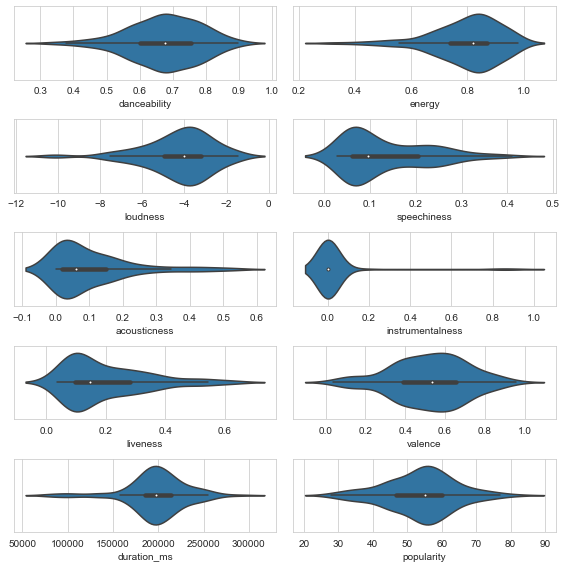

In [31]:
fig, axs = plt.subplots(5, 2, sharey=False, figsize=(8,8), tight_layout = True)
sns.violinplot(x='danceability', data=unique_df, ax=axs[0,0])
sns.violinplot(x='energy', data=unique_df, ax=axs[0,1])
sns.violinplot(x='loudness', data=unique_df, ax=axs[1,0])
sns.violinplot(x='speechiness', data=unique_df, ax=axs[1,1])
sns.violinplot(x='acousticness', data=unique_df, ax=axs[2,0])
sns.violinplot(x='instrumentalness', data=unique_df, ax=axs[2,1])
sns.violinplot(x='liveness', data=unique_df, ax=axs[3,0])
sns.violinplot(x='valence', data=unique_df, ax=axs[3,1])
sns.violinplot(x='duration_ms', data=unique_df, ax=axs[4,0])
sns.violinplot(x='popularity', data=unique_df, ax=axs[4,1])
plt.show()

As analysed from the graphs above, we can see that Stray Kids' songs are generally energetic and loud. This makes sense since Stray Kids' usually releases hip hop and electronic music that are rap-based. Also, in the last few years, a lot of people have deemed Stray Kids' music as 'noise music'. However, as implied by the members of Stray Kids, they are extremely proud of the loud and noisy songs they release, and this is also backed up in the graph as they seem to be releasing this type of music continuously.

Additionally, due to the fact that they are a Kpop group where a lot of group artists rely heavily on dancing for performances, the danceability of their songs are also relatively high.

Something that I realised from the graph is that Stray Kids do not release much of their songs' instrumentals, as shown in the instrumentalness graph. Their songs are also generally do not contain much speech, which I predicted to be otherwise since they are a heavily rap-based group. However, I have a theory that this might be due to their songs also containing a good amount of singing and melodic raps.

Their songs are also mostly around the 3 minutes mark, which is quite general to most of the songs released today, meaning that they still cater to the general public in terms of song length. Talking about the general public, let us analyse regarding the popularity of their songs amongst their listeners. The popularity graph indicates that they have regular listeners that stream their music in Spotify and is quite stable in terms of their music these days.

### Correlation between the songs' features

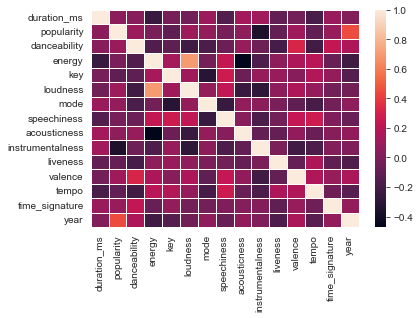

In [32]:
sns.heatmap(df.corr(), linewidths=.5, robust=False)
plt.show()

Now this is interesting. The heat map above shows certain features that I expected to have a high correlation, but is not indicated as so.

I would expect the instrumentalness of a track to correlate highly with its popularity as they are expected to release songs featuring their voices generally, and instrumentals of Kpop groups are usually not streamed as much.

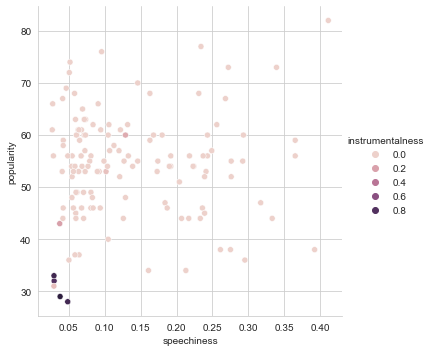

In [33]:
sns.relplot(x='speechiness', y='popularity', data=unique_df, hue='instrumentalness')
plt.show()

As expected, Stray Kids' instrumental releases do not do as well as their non-instrumental releases. Since instrumentals do not contain speech, their speechiness values are really low, but non-instrumentals have varied speechiness values and it does not seem to affect the popularity of the songs.

Moving on, the heat map does show that the loudness correlates highly with the energy of a song. Let us visualise this even more to analyse it better.Moreover, the heat map does show that the loudness correlates highly with the energy of a song. Let us visualise this even more to analyse it better.

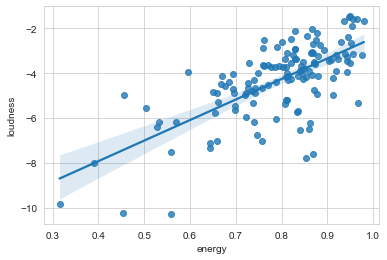

In [34]:
sns.regplot(x='energy', y='loudness', data=unique_df)
plt.show()

There we go! The graph indicates the existence of a linear regression, where the loudness and energy are related linearly. As the energy of their songs increase, the loudness increases as well.

Looking back to the heat map, there is a slight correlation between the danceability and the valence of their songs, which is unexpected. Therefore, it should be visualised to see what creates the correlation between them.

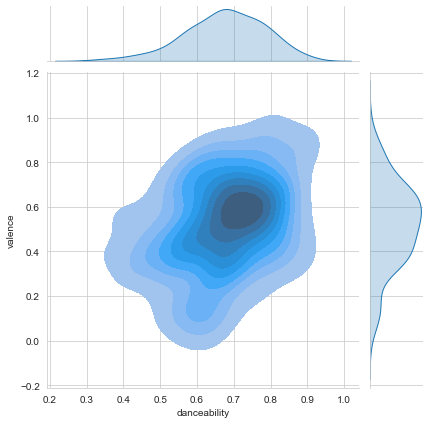

In [35]:
sns.jointplot(x='danceability', y='valence', data=unique_df, kind='kde', fill=True)
plt.show()

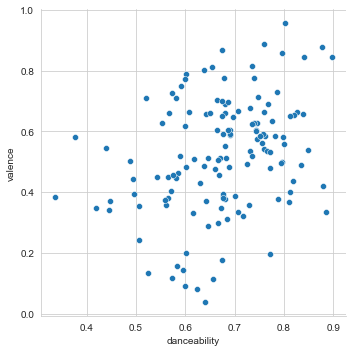

In [36]:
sns.relplot(x='danceability', y='valence', data=unique_df)
plt.show()

Looking at the graphs above, there is not much to be said about the correlation between the danceability and valence of their songs. However, something I noticed is that their songs with higher danceability (above the 0.7 mark) tends to have a higher valence.

Lastly, let's analyse the correlation between the duration of the song and its energy.

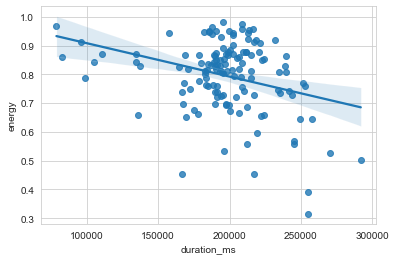

In [92]:
sns.regplot(x='duration_ms', y='energy', data=unique_df)
plt.show()

This is interesting since the longer songs tends to have a lower energy level while the shorter songs tends to have a higher energy level. A conclusion that can be drawn from here is that shorter songs are usually more impactful and climatic, while longer songs are usually aimed to be easier to listen to. Climatic songs tend to get boring faster it is impactful from the very beginning, so it makes perfect sense to make the more energetic songs shorter in duration.

## Analysis of Stray Kids' songs' popularity

Over the past few years, Stray Kids has been growing continuously in the music industry, and their songs have seem to be getting more popular continuously. To confirm this, we can analyse the popularity of their songs.
### Number of releases
To start off, we need to sort the data according to the release date.

In [37]:
# Sort according to the release date
df_sorted_date = df.sort_values(by=['release_date'])
unique_df_sorted_date = unique_df.sort_values(by=['release_date'])

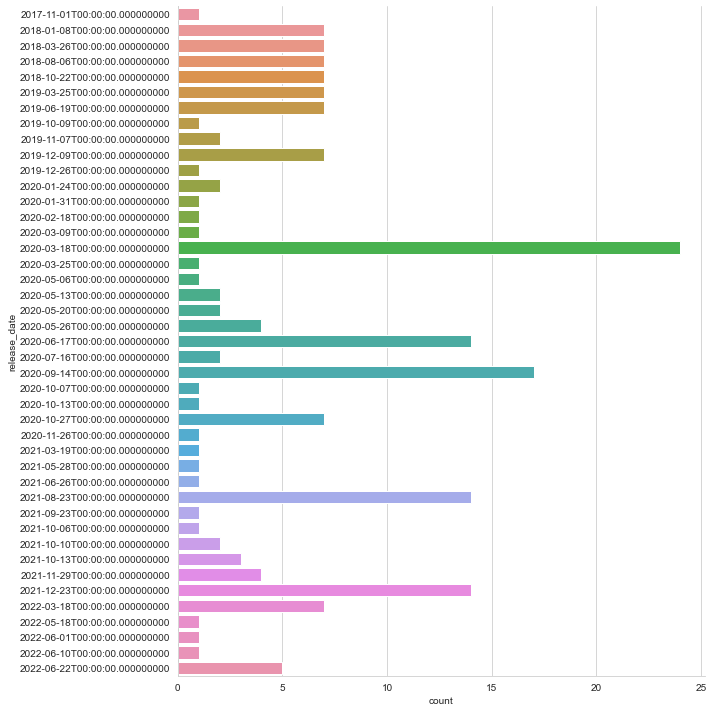

In [38]:
ax = sns.catplot(y='release_date', data=df_sorted_date, kind='count', height=10)
plt.show()

Stray Kids released the most songs on March 18, 2020 as seen from the graph. Let us see what songs those are.

In [39]:
df[df['release_date'] == '2020-03-18']

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
191,4FIEtn5MqtRyAHpPJDsDkj,19,Stray Kids,SKZ2020,2020-03-18,206440,54,0.788,0.667,10,...,1,0.2240,0.43900,0.000000,0.0972,0.379,105.004,4,2020,03:26:440000
196,4TXHE0TVqmAMmCRfGurb15,Astronaut,Stray Kids,SKZ2020,2020-03-18,180053,54,0.739,0.840,1,...,0,0.1040,0.01890,0.000000,0.1830,0.627,120.050,4,2020,03:00:053000
184,2mBtKEUCZVh9BTDhlj5OiW,Awkward Silence,Stray Kids,SKZ2020,2020-03-18,195320,56,0.573,0.893,10,...,0,0.2430,0.09570,0.000000,0.0974,0.725,200.110,4,2020,03:15:320000
174,4xvA5uuQrpdGXoO2Mv72Kb,BEWARE,Stray Kids,SKZ2020,2020-03-18,190653,52,0.676,0.951,1,...,1,0.2390,0.04140,0.000000,0.3780,0.393,98.034,4,2020,03:10:653000
189,09i5WtpyEswhWwzmucaAVw,Boxer,Stray Kids,SKZ2020,2020-03-18,202293,56,0.585,0.903,2,...,1,0.1330,0.00716,0.000000,0.1850,0.462,104.891,4,2020,03:22:293000
190,58epKNTOOt4RDWObkR9e43,Chronosaurus,Stray Kids,SKZ2020,2020-03-18,200440,56,0.668,0.883,2,...,1,0.0488,0.28900,0.000000,0.2800,0.455,100.008,4,2020,03:20:440000
177,430IfeGHWJxnZOkhBYACt9,District 9,Stray Kids,SKZ2020,2020-03-18,213586,60,0.646,0.954,9,...,1,0.1800,0.01700,0.000006,0.1220,0.513,89.999,4,2020,03:33:586000
194,1Sftw4WKhFJGv7qQXlse4Y,Double Knot,Stray Kids,SKZ2020,2020-03-18,191546,59,0.752,0.738,5,...,0,0.3650,0.05410,0.000000,0.5260,0.585,146.944,4,2020,03:11:546000
186,0uUOYmOu7V6v18XLkVtjDF,Get Cool,Stray Kids,SKZ2020,2020-03-18,196440,58,0.802,0.853,2,...,1,0.1130,0.07420,0.000000,0.2800,0.956,151.958,4,2020,03:16:440000
179,2XwBhQ6GqXa27dh8ELQOPE,Grow Up,Stray Kids,SKZ2020,2020-03-18,213040,57,0.552,0.944,7,...,1,0.2490,0.11400,0.000000,0.3530,0.626,174.089,4,2020,03:33:040000


Turns out all the songs released on that date is from the compilation album 'SKZ2020', which is the re-release of their older songs but the 8 member version. It makes sense since compilation albums usually contain more songs than regular albums.

Let's visualise Stray Kids' releases per year to summarise the previous discovery in a simpler graph.

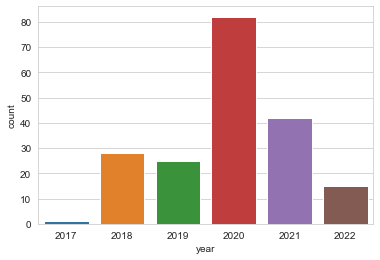

In [40]:
sns.countplot(x='year', data=df_sorted_date)
plt.show()

Even after combining the releases per year, the year with the most songs Stray Kids released is still 2020, the year they came out with compilation album 'SKZ2020'. One thing to notice is the data for the year 2017 differs from the other years by a lot. Let's look for the releases in 2017 to check.

In [41]:
df[df['year'] == 2017]

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
172,1fBirzBj8XiiXFlhUMGoAl,Hellevator,Stray Kids,Hellevator,2017-11-01,240000,39,0.515,0.816,10,...,1,0.165,0.00816,0.0,0.35,0.288,78.17,4,2017,04:00:000000


There is only one song that was released in 2017, but it is not an error in the data. Before the survival show started in 2017, Stray Kids released the single 'Hellevator' as an introduction to the general public.

### Popularity

The popularity of the songs in Spotify are determined by how much it is played by the listeners and how recent those plays are. That being said, let us analyse the popularity of Stray Kids' songs and see whether their older or newer songs are more popular recently.

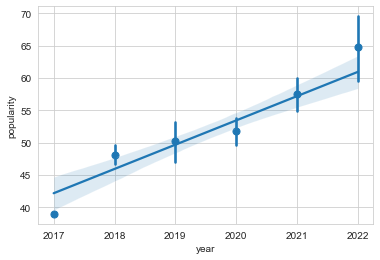

In [45]:
sns.regplot(x='year', y='popularity', data=df, x_estimator=np.mean)
plt.show()

As seen in the graph, Stray Kids' newer songs are currently more popular amongst. The graph is growing linearly, and we can conclude from this graph that Stray Kids' releases have steady listeners and there are no signs of any 'one-hit wonder' in their discography. 'One-hit wonder' is when a song released by a less popular artist that suddenly becomes extremely popular, but their next releases do not live up to the hype and the artist's popularity declines again.

Stray Kids' listeners keep up with Stray Kids' new releases and streams the newer songs, which is expected for Kpop fans who deem streams as very important and crucial to the artist's success. Let's see which songs by Stray Kids that are currently the most and least popular.

In [52]:
df.sort_values('popularity', ascending=False)

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
1,63irPUP3xB74fHdw1Aw9zR,MANIAC,Stray Kids,ODDINARY,2022-03-18,182757,82,0.581,0.800,1,...,1,0.4110,0.154000,0.00000,0.0697,0.7090,119.872,5,2022,03:02:757000
22,0nwTMzpatarzvLvtwwzdCt,Thunderous,Stray Kids,NOEASY,2021-08-23,183266,77,0.601,0.786,1,...,1,0.2340,0.213000,0.00000,0.2090,0.7900,172.156,4,2021,03:03:266000
128,2uw2ftfyS4yJLWiTtbxasE,CIRCUS,Stray Kids,CIRCUS,2022-06-10,194440,76,0.767,0.809,5,...,0,0.0958,0.033700,0.00000,0.0353,0.6900,97.958,4,2022,03:14:440000
60,4XPXrcpyNr30Km6aPiflJy,God’s Menu,Stray Kids,GO LIVE,2020-06-17,167922,75,0.689,0.771,5,...,1,0.0548,0.007760,0.00000,0.5210,0.4820,157.052,4,2020,02:47:922000
2,4QDpsNBlllaLGj8zbF2EE0,Charmer,Stray Kids,ODDINARY,2022-03-18,188573,74,0.786,0.762,1,...,1,0.0519,0.052400,0.00001,0.0971,0.7310,90.963,4,2022,03:08:573000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,6W0opcAxxH4LmLjiyafIyl,Here Always (SEUNGMIN of Stray Kids) - Instrum...,Stray Kids,"Hometown Cha-Cha-Cha, Pt. 7 (Original Televisi...",2021-10-10,254771,33,0.641,0.315,7,...,1,0.0296,0.132000,0.86300,0.1060,0.0387,82.025,4,2021,04:14:771000
170,2b2wyqQRUsWfUnTMuQROGT,끝나지 않을 이야기 Instrumental,Stray Kids,Extraordinary You Pt.7 (Original Television So...,2019-11-07,244865,32,0.602,0.558,5,...,1,0.0298,0.008360,0.79600,0.1060,0.2000,80.011,4,2019,04:04:865000
155,7GpApJuGyURffqtbgCHrJN,SLUMP (Instrumental),Stray Kids,TOP -Japanese ver.-,2020-05-26,136226,31,0.575,0.660,7,...,1,0.0295,0.001700,0.07570,0.0942,0.4560,160.083,4,2020,02:16:226000
154,0yDK2hOXbc8RhxNo3DOX2p,TOP (Instrumental),Stray Kids,TOP -Japanese ver.-,2020-05-26,188013,29,0.584,0.939,7,...,1,0.0381,0.000037,0.93900,0.2730,0.1570,97.995,4,2020,03:08:013000


The first four most popular songs are the newer title tracks released by Stray Kids, which makes sense since title tracks are more likely to be listened by non-fans and casual listeners. The fifth most popular one is interesting as it is not a title track. This might happen due to its popularity in social media, increasing its exposure to the general public.

### Characteristics of Stray Kids' songs
Let's find out the general characteristics of Stray Kids' discography, starting with the mode they use for their songs.

In [67]:
unique_df = unique_df.sort_values('mode', ascending=False)

54

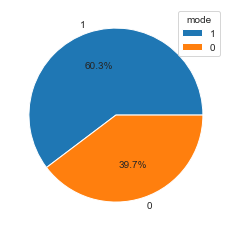

In [62]:
plt.pie(unique_df['mode'].value_counts(), labels=unique_df['mode'].unique(), autopct='%1.1f%%')
plt.legend(title='mode')
plt.show()

In [74]:
# Count the number of songs that are major and minor
major = unique_df['id'][unique_df['mode'] == 1].count()
minor = unique_df['id'][unique_df['mode'] == 0].count()
print('Major:', major)
print('Minor:', minor)

Major: 82
Minor: 54


Stray Kids released more major songs compared to minor songs by 20%. This difference is not so striking, indicating that Stray Kids does release songs with the two different modes, and does not only stick with one mode.

Moving on, let's analyse the keys of Stray Kids' songs.

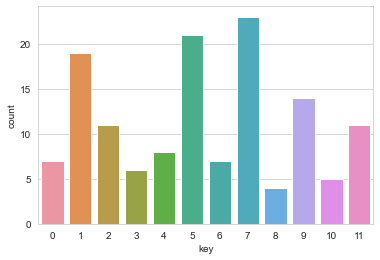

In [76]:
sns.countplot(x='key', data=unique_df)
plt.show()

The keys that Stray Kids use most often is G, followed by F and C#, while the key used lest often is G#. The difference in number of songs of the most used key and the least used key is striking in this one. Let us find out the songs using the least popular key (G#).

In [86]:
unique_df[unique_df['key'] == 8]

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
150,2PujZcAaAMGsOeTUjrzkrz,Hello Stranger,Stray Kids,POP OUT BOY! Part.1,2020-07-16,239653,54,0.706,0.865,8,...,1,0.0686,0.0232,0.0,0.328,0.667,99.999,4,2020,03:59:653000
37,4GyHQOpfrElhvKjIfXSEf3,One Day,Stray Kids,ALL IN,2020-10-27,193186,49,0.760,0.810,8,...,1,0.0810,0.1460,0.0,0.072,0.542,145.054,4,2020,03:13:186000
79,4YQel4FiTWYHUn6TXMCuPa,You Can STAY,Stray Kids,Clé : LEVANTER,2019-12-09,208443,54,0.730,0.757,8,...,1,0.0542,0.0153,0.0,0.111,0.356,94.986,4,2019,03:28:443000
48,2i15lsdOIZb9PpuAFKO58Y,"Wow (Lee Know, Hyunjin, Felix)",Stray Kids,IN LIFE,2020-09-14,193811,61,0.731,0.723,8,...,0,0.0678,0.0037,0.0,0.068,0.534,127.921,4,2020,03:13:811000


These songs are older songs by Stray Kids from 2019 and 2020. The interesting thing about these songs is that their danceability and energy values are similar, and their popularity ranges from 49 to 61 which is not much of a striking difference.

Now let's see songs using the most used key (G).

In [88]:
unique_df[unique_df['key'] == 7]

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
158,00gd5jfJPOmxCKGHpew7zu,"TOP - ""Tower of God"" OP",Stray Kids,TOP,2020-05-13,185840,38,0.445,0.947,7,...,1,0.2610,0.003840,0.0000,0.1180,0.3420,195.715,4,2020,03:05:840000
152,4UV1PJZFkjuzVxrPkgNh6X,TOP -Japanese ver.-,Stray Kids,TOP -Japanese ver.-,2020-05-26,188013,46,0.629,0.965,7,...,1,0.0939,0.001460,0.0000,0.2540,0.4300,98.024,4,2020,03:08:013000
179,2XwBhQ6GqXa27dh8ELQOPE,Grow Up,Stray Kids,SKZ2020,2020-03-18,213040,57,0.552,0.944,7,...,1,0.2490,0.114000,0.0000,0.3530,0.6260,174.089,4,2020,03:33:040000
154,0yDK2hOXbc8RhxNo3DOX2p,TOP (Instrumental),Stray Kids,TOP -Japanese ver.-,2020-05-26,188013,29,0.584,0.939,7,...,1,0.0381,0.000037,0.9390,0.2730,0.1570,97.995,4,2020,03:08:013000
155,7GpApJuGyURffqtbgCHrJN,SLUMP (Instrumental),Stray Kids,TOP -Japanese ver.-,2020-05-26,136226,31,0.575,0.660,7,...,1,0.0295,0.001700,0.0757,0.0942,0.4560,160.083,4,2020,02:16:226000
139,6W0opcAxxH4LmLjiyafIyl,Here Always (SEUNGMIN of Stray Kids) - Instrum...,Stray Kids,"Hometown Cha-Cha-Cha, Pt. 7 (Original Televisi...",2021-10-10,254771,33,0.641,0.315,7,...,1,0.0296,0.132000,0.8630,0.1060,0.0387,82.025,4,2021,04:14:771000
56,55Nq3mwhH1p1FjDAzttnIN,Blueprint,Stray Kids,IN LIFE,2020-09-14,251300,45,0.744,0.770,7,...,1,0.0599,0.059100,0.0000,0.2870,0.6060,109.977,4,2020,04:11:300000
153,3HjisHgaiGPIcCVI7ozBxY,SLUMP -Japanese ver.-,Stray Kids,TOP -Japanese ver.-,2020-05-26,137080,34,0.592,0.830,7,...,1,0.2130,0.145000,0.0000,0.1240,0.7510,159.887,4,2020,02:17:080000
156,2wkkamnFrdc7fkgtVqTODc,TOP - English Ver.,Stray Kids,TOP (English Ver.),2020-05-20,185839,46,0.616,0.949,7,...,1,0.1870,0.002600,0.0000,0.1660,0.3300,97.942,4,2020,03:05:839000
134,0b9YBfAcbnhVDUFmsfpDFj,DOMINO - English Ver.,Stray Kids,Christmas EveL,2021-11-29,198733,59,0.680,0.877,7,...,1,0.0425,0.027700,0.0000,0.0731,0.6900,160.063,4,2021,03:18:733000


Looking at these data, I see a problem happening. Some of these songs are just different versions of themselves, such as different language versions or instrumental versions. This causes the data to be skewed, resulting in the striking difference of the most used key and least used key. This can be fixed by only keeping one version of each song for analysis, but due to time constraint, I will not be doing it.

Moving on let's analyse the time signatures used by Stray Kids in their songs. Mainstream songs these days are in the 4/4 time signature, so we can expect the 4/4 time signature to be the most prominent in Stray Kids' discography.

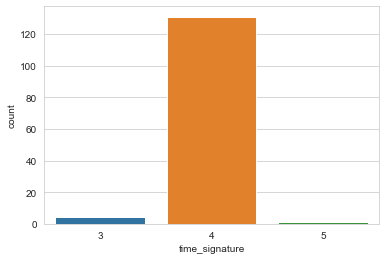

In [100]:
sns.countplot(x='time_signature', data=unique_df)
plt.show()

As expected, most of their songs are in the 4/4 time signature, but it turns out that they also have released songs in the other time signatures, showing their courage in experimentation in their songs. Let us see what songs they are.

In [102]:
unique_df[unique_df['time_signature'] != 4]

,id,name,artist,album,release_date,duration_ms,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,duration
192,39doHPm8Vsicb2kuD0weyZ,Side Effects,Stray Kids,SKZ2020,2020-03-18,195253,60,0.595,0.980,2,...,1,0.168,0.0223,0.000000,0.0667,0.143,97.452,3,2020,03:15:253000
162,2MYXIgYwlj1J0Tf6IXXed6,Mixtape : On Track,Stray Kids,Mixtape : On Track,2020-03-25,207814,40,0.440,0.790,6,...,1,0.105,0.2110,0.000000,0.4900,0.546,171.150,3,2020,03:27:814000
21,7qpSatdWQcRHA3hpedL2u4,CHEESE,Stray Kids,NOEASY,2021-08-23,182080,67,0.376,0.946,2,...,1,0.268,0.0302,0.000000,0.1470,0.581,89.657,3,2021,03:02:080000
1,63irPUP3xB74fHdw1Aw9zR,MANIAC,Stray Kids,ODDINARY,2022-03-18,182757,82,0.581,0.800,1,...,1,0.411,0.1540,0.000000,0.0697,0.709,119.872,5,2022,03:02:757000
108,34MjyCKTNnDNFFXBaadEsy,NOT!,Stray Kids,I am NOT,2018-03-26,82437,44,0.572,0.859,4,...,0,0.333,0.0201,0.000367,0.2360,0.404,170.248,3,2018,01:22:437000


Some of these songs are the more popular songs by Stray Kids, indicating that that they can do well with experimentation of their songs and explore outside of the norm.

Next, we can take a look at the valence of Stray Kids' songs over the years.

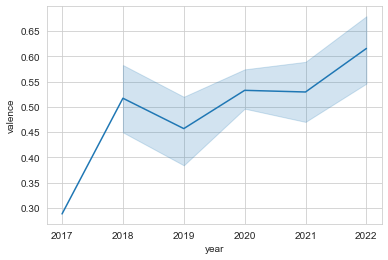

In [101]:
sns.lineplot(x='year', y='valence', data=df)
plt.show()

As an avid listener, I can understand why the graph above is as such. During the beginning of Stray Kids' career in the music industry, they mostly release songs about feeling disconnected to one's self, identity crisis and the feeling of being left behind. However, as their career progressed, they began to release more songs about confidence, not caring about what other people have to judge about them. This can be the cause of why the valence value of their songs increases as time passes.

## Conclusion
Stray Kids is making good progress in the music industry and we can already see their own colors in the songs they release.

In [94]:
fig = px.line_polar(features_df, r='mean', theta='feature', line_close=True, template="plotly_white")
fig.update_traces(fill='toself')
fig.show()

The radar chart above shows how Stray Kids' discography contains a lot of very upbeat and energetic songs, living up to what the public has said about them creating their own genre, the 'mala taste genre'. Their confidence in their songs also stands out in their energetic songs as they continue to make the 'noise music' or 'construction music' that they are proud of.

## References
- "Spotify Developer Terms | Spotify For Developers". 2022. Developer.Spotify.Com. https://developer.spotify.com/terms/.

- "Data Analysis Of The 'Spotify' Dataset Using The Pandas Library". 2021. Datascience.Fm - The #1 Data Science Channel. https://datascience.fm/fun-analysis-of-spotify-dataset-to-gain-insights-on-music-industry/.

- "Stray Kids - Wikipedia". 2022. En.Wikipedia.Org. https://en.wikipedia.org/wiki/Stray_Kids.

- "Stray Kids". 2022. Spotify. https://open.spotify.com/artist/2dIgFjalVxs4ThymZ67YCE.

- "Web API | Spotify For Developers". 2022. Developer.Spotify.Com. https://developer.spotify.com/documentation/web-api/.

- https://betterprogramming.pub/how-to-extract-any-artists-data-using-spotify-s-api-python-and-spotipy-4c079401bc37

- "Matplotlib Documentation — Matplotlib 3.5.2 Documentation". 2022. Matplotlib.Org. https://matplotlib.org/stable/index.html.

- "Taste_Analysis". 2022. Exportify.Net. https://exportify.net/taste_analysis.

- "Analyzing Spotify Audio Features". 2021. The Record Industry. https://www.therecordindustry.io/analyzing-spotify-audio-features/.

- "Data Visualization With Python And Seaborn — Part 5: Scatter Plot & Joint Plot". 2019. Medium. https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-5-scatter-plot-joint-plot-d7312164dc32.

- VanderPlas, Jake. 2022. "Visualization With Seaborn | Python Data Science Handbook". Jakevdp.Github.Io. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html.

- "Different Ways To Create Pandas Dataframe - Geeksforgeeks". 2018. Geeksforgeeks. https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/.

- "Seaborn: Statistical Data Visualization — Seaborn 0.11.2 Documentation". 2022. Seaborn.Pydata.Org. https://seaborn.pydata.org/.

- "Polar". 2022. Plotly.Com. https://plotly.com/python/polar-chart/.